## Исследуем таблицы базы данных

### ER-диаграмма

Работу с новой базой данных лучше начать с изучения схемы (ER-диаграммы):

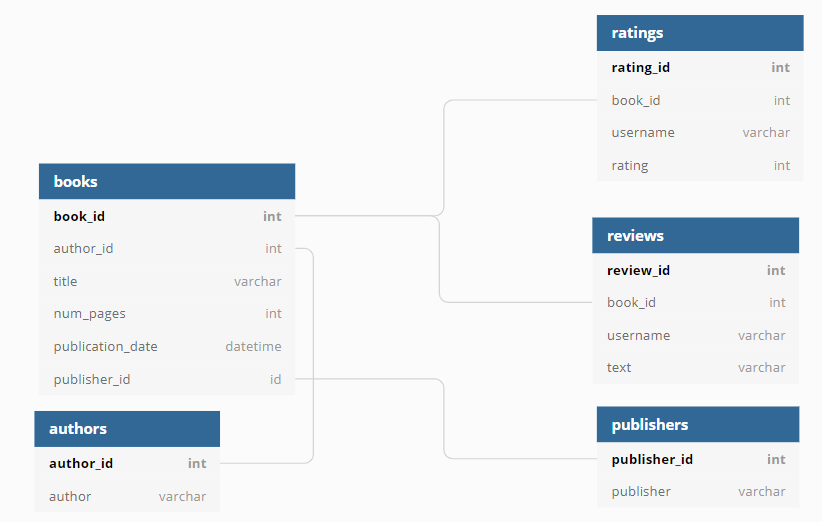

### Знакомство с таблицами

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None)

In [2]:
# устанавливаем параметры
db_config = {'user': '****', # имя пользователя
'pwd': '****', # пароль
'host': '****',
'port': 1111, # порт подключения
'db': '****'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
# запрос и вывод датафрейма
books_query = '''
SELECT *
FROM books
'''
books = pd.read_sql_query(books_query, con = engine, parse_dates=['publication_date']) 
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
pd.read_sql_query('''
SELECT COUNT(*)
FROM books
''', con = engine) 

,count
0,1000


**Таблица** `books` cодержит данные о книгах и насчитывает 1000 записей:
* `book_id` — идентификатор книги;
* `author_id` — идентификатор автора;
* `title` — название книги;
* `num_pages` — количество страниц;
* `publication_date` — дата публикации книги;
* `publisher_id` — идентификатор издателя.

In [5]:
# запрос и вывод датафрейма
authors_query = '''
SELECT *
FROM authors
'''
authors = pd.read_sql_query(authors_query, con = engine) 
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
pd.read_sql_query('''
SELECT COUNT(*)
FROM authors
''', con = engine) 

,count
0,636


**Таблица** `authors` cодержит данные об авторах и насчитывает 636 записей:
* `author_id` — идентификатор автора;
* `author` — имя автора.

In [7]:
# запрос и вывод датафрейма
publishers_query = '''
SELECT *
FROM publishers
'''
publishers = pd.read_sql_query(publishers_query, con = engine) 
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [8]:
pd.read_sql_query('''
SELECT COUNT(*)
FROM publishers
''', con = engine) 

,count
0,340


**Таблица** `publishers` cодержит данные об издательствах и насчитывает 340 записей:
* `publisher_id` — идентификатор издательства;
* `publisher` — название издательства.

In [9]:
# запрос и вывод датафрейма
ratings_query = '''
SELECT *
FROM ratings
'''
ratings = pd.read_sql_query(ratings_query, con = engine) 
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [10]:
pd.read_sql_query('''
SELECT COUNT(*)
FROM ratings
''', con = engine) 

,count
0,6456


**Таблица** `ratings` cодержит данные о пользовательских оценках книг и насчитывает 6456 записей:
* `rating_id` — идентификатор оценки;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, оставившего оценку;
* `rating` — оценка книги.

In [11]:
# запрос и вывод датафрейма
reviews_query = '''
SELECT *
FROM reviews
'''
reviews = pd.read_sql_query(reviews_query, con = engine) 
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


In [12]:
pd.read_sql_query('''
SELECT COUNT(*)
FROM reviews
''', con = engine) 

,count
0,2793


**Таблица** `reviews` cодержит данные о пользовательских обзорах и насчитывает 2793 записи:
* `review_id` — идентификатор обзора;
* `book_id` — идентификатор книги;
* `username` — имя автора обзора;
* `text` — текст обзора.

## С помощью SQL-запросов посмотрим:

### Сколько книг вышло после 1 января 2000 года

In [13]:
# максимальная и минимальная даты публикации в БД
query = '''
SELECT MIN(publication_date),
       MAX(publication_date)
FROM books
'''
pd.read_sql_query(query, con = engine)

,min,max
0,1952-12-01,2020-03-31


In [14]:
# количество книг, вышедших после 1 января 2000 года
query = '''
SELECT DISTINCT COUNT(book_id)
FROM books
WHERE publication_date >= '2000-01-01'
'''
pd.read_sql_query(query, con = engine)

,count
0,821


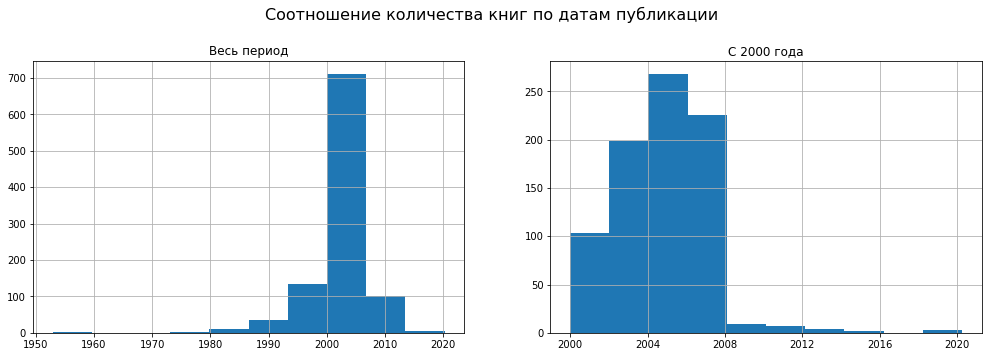

In [15]:
# распределение книг по датам публикации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle('Соотношение количества книг по датам публикации', fontsize=16, y=1.03)
ax1.grid()
ax1.hist(books['publication_date'])
ax1.set_title('Весь период')
ax2.grid()
ax2.hist(books.query('publication_date >= "2000-01-01"')['publication_date'])
ax2.set_title('С 2000 года');

<div style="border:solid green 1px; padding: 10px">
    
* Всего в таблице 1000 книг, опубликованных за период с 1 декабря 1952 года по 31 марта 2020 года.
* Из них после 1 января 2000 года опубликована 821 книга.
* Больше всего в нашей базе данных книг, опубликованных в период с 2000 по 2008 года (пик 2004-2006гг.) 

### Для каждой книги посчитаем количество обзоров и среднюю оценку

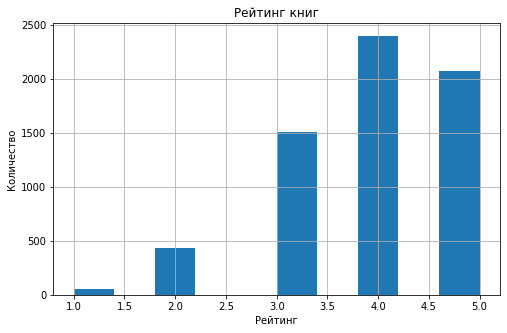

In [16]:
# распределение оценок
query = '''
SELECT book_id,
       rating
FROM ratings
'''
rating_vis = pd.read_sql_query(query, con = engine)

rating_vis['rating'].hist(figsize=(8, 5))
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.title('Рейтинг книг');

In [17]:
# определим долю 
query = '''
    SELECT rating,
           COUNT(book_id) AS count_books,
           ROUND(COUNT(book_id)::numeric / (SELECT COUNT(book_id) FROM ratings) * 100, 2) AS share
    FROM ratings
    GROUP BY rating
    ORDER BY rating
'''
share = pd.read_sql_query(query, con = engine)

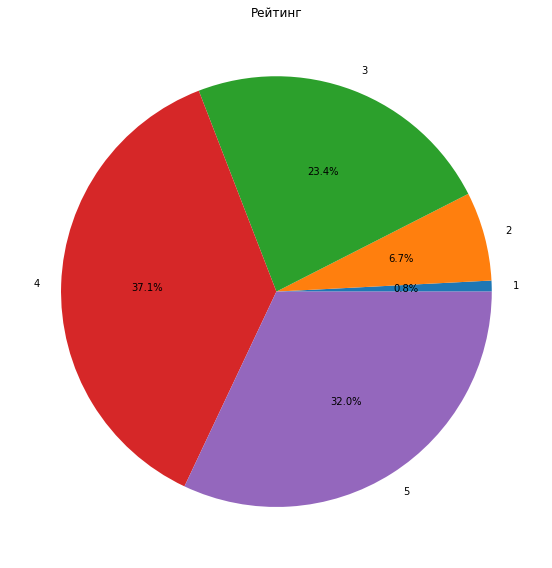

In [18]:
# построим диаграмму долей рейтинга
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(share['share'], labels=share['rating'], autopct='%.1f%%')
ax.set_title('Рейтинг')
plt.tight_layout()

In [32]:
# количество обзоров и средняя оценка
query = '''
SELECT DISTINCT title,
       b.book_id,
       COUNT(DISTINCT review_id) AS count_reviews,
       COUNT(DISTINCT rating) AS count_rating,
       ROUND(AVG(rating), 2) AS avg_rating
FROM books AS b
LEFT JOIN ratings AS r ON b.book_id = r.book_id
LEFT JOIN reviews AS rw ON b.book_id = rw.book_id
GROUP BY title, b.book_id
ORDER BY avg_rating DESC, count_reviews DESC
'''
pd.read_sql_query(query, con = engine)

,title,book_id,count_reviews,count_rating,avg_rating
0,A Dirty Job (Grim Reaper #1),17,4,1,5.00
1,Moneyball: The Art of Winning an Unfair Game,444,3,1,5.00
2,School's Out—Forever (Maximum Ride #2),553,3,1,5.00
3,A Fistful of Charms (The Hollows #4),20,2,1,5.00
4,A Woman of Substance (Emma Harte Saga #1),55,2,1,5.00
...,...,...,...,...,...
995,The World Is Flat: A Brief History of the Twenty-first Century,915,3,2,2.25
996,Drowning Ruth,202,3,2,2.00
997,His Excellency: George Washington,316,2,1,2.00
998,Junky,371,2,2,2.00


<div style="border:solid green 1px; padding: 10px">
    
* В базе данных рейтинг книг распределен так:
    - больше всего книг с оценкой в 4 балла - 2396 шт. и это около 37% от всех книг в БД;
    - затем идут книги, оценненые в 5 баллов  - 2067 шт. и это около 32% от всех книг в БД;
    - далее в 3 балла  - 1509 шт. и это около 23% от всех книг в БД;
    - и совсем немного книг с оценков в 2 (431 шт., ~7% от всех книг в БД) или 1 балл (53 меньше 1% от всех книг в БД)
    
    
* Максимальное количество обзоров (4 шт.) и средняя оценка (5 баллов) у книги `A Dirty Job (Grim Reaper #1)` автора `Christopher Moore`, изданной `William Morrow`
* Минимальное количество обзоров (2 шт.) и средняя оценка (1.5 балла) у книги `Harvesting the Heart` автора `Jodi icoult`, изданной `Penguin Books`    

### Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры

In [25]:
# ТОП-5 издательств, выпустивших наибольшее число книг
query = '''
SELECT publisher,
       count_books
FROM publishers AS p
JOIN (
    SELECT publisher_id,
           COUNT(book_id) AS count_books
    FROM books
    GROUP BY publisher_id
    ORDER BY count_books DESC
    LIMIT 5) AS q ON p.publisher_id = q.publisher_id
'''
pd.read_sql_query(query, con = engine)

,publisher,count_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


In [26]:
# издательство, выпустившее наибольшее число книг толще 50 страниц
query = '''
SELECT publisher,
       count_books
FROM publishers AS p
JOIN (
    SELECT publisher_id,
           COUNT(book_id) AS count_books
    FROM books
    WHERE num_pages > 50
    GROUP BY publisher_id
    ORDER BY count_books DESC
    LIMIT 1) AS q ON p.publisher_id = q.publisher_id
'''
pd.read_sql_query(query, con = engine)

,publisher,count_books
0,Penguin Books,42


<div style="border:solid green 1px; padding: 10px">
    
* В нашей БД 340 издательств, из них ТОП-5 по выпуску книг:
    - `Penguin Books` - 42 книги и это же издательство выпустило больше всего книг толще 50 страниц;
    - `Vintage`	- 31 книга;
    - `Grand Central Publishing` - 25 книг;
    - `Penguin Classics` -24 книги;
    - `Bantam` - 19 книг.

### Определим автора с самой высокой  и самой низкой средней оценкой книг — учитывая только книги с 50 и более оценками

In [27]:
# ТОП-5 авторов по среднему рейтингу книг со 100 и более оценками
query = '''
SELECT author,
       COUNT(rating_id) AS count_rating,
       ROUND(AVG(rating), 2) AS avg_rating
FROM ratings AS r
JOIN books AS b ON r.book_id = b.book_id
JOIN authors AS a ON b.author_id = a.author_id
GROUP BY author
HAVING COUNT(rating_id) >= 100
ORDER BY avg_rating DESC, count_rating DESC
'''
pd.read_sql_query(query, con = engine)

,author,count_rating,avg_rating
0,J.K. Rowling/Mary GrandPré,312,4.29
1,J.R.R. Tolkien,166,4.24
2,Stephen King,106,4.01
3,Nicholas Sparks,111,3.88
4,Dan Brown,143,3.74
5,Stephenie Meyer,160,3.66


In [28]:
# автор с самой высокой и самой низкой средней оценкой книг — учитывая только книги с 50 и более оценками
query = '''
(SELECT title,
       author,
       COUNT(rating_id) AS count_rating,
       ROUND(AVG(rating), 2) AS avg_rating
FROM ratings AS r
JOIN books AS b ON r.book_id = b.book_id
JOIN authors AS a ON b.author_id = a.author_id
GROUP BY title, author
HAVING COUNT(rating_id) >= 50
ORDER BY avg_rating DESC
LIMIT 1)
UNION
(SELECT title,
       author,
       COUNT(rating_id) AS count_rating,
       ROUND(AVG(rating), 2) AS avg_rating
FROM ratings AS r
JOIN books AS b ON r.book_id = b.book_id
JOIN authors AS a ON b.author_id = a.author_id
GROUP BY title, author
HAVING COUNT(rating_id) >= 50
ORDER BY avg_rating
LIMIT 1)
'''
pd.read_sql_query(query, con = engine)

,title,author,count_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,82,4.41
1,Of Mice and Men,John Steinbeck,61,3.62


<div style="border:solid green 1px; padding: 10px">
    
ТОП-5 наиболее популярных авторов, чьи книги набрали 100 и более отзывов и самую высокую среднюю оценку:
* `J.K. Rowling/Mary GrandPré` - 312 оценок - 4.29 баллов в среднем;
* `J.R.R. Tolkien` - 166 оценок - 4.24 баллов в среднем;
* `Stephen King` - 106 оценок - 4.01 баллов в среднем;
* `Nicholas Sparks` - 111 оценок - 3.88 баллов в среднем;
* `Dan Brown` - 143 оценок - 3.74 баллов в среднем;
* `Stephenie Meyer` - 160 оценок - 3.66 баллов в среднем.
    
И авторы с самой высокой и самой низкой средней оценкой книг — учитывая только книги с 50 и более оценками:
    
* `J.K. Rowling/Mary GrandPré` и книга `Harry Potter and the Prisoner of Azkaban (Harry Potter #3)` набрала 82 оценки и имеет самый высокий средний рейтинг в 4.41 балл;
* `John Steinbeck` и книга `Of Mice and Men	` набрала 61 оценку и самый низкий средний балл в 3.62.    

### Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [29]:
# посчитаем количество обзоров от пользователей, которые поставили больше 50 оценок
query = '''
SELECT username,
       COUNT(review_id) AS reviews
FROM reviews
WHERE username IN (
    SELECT username
    FROM (
        SELECT DISTINCT username,
               COUNT(rating_id) AS count_rating
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) >= 50) as q)
GROUP BY username
ORDER BY reviews DESC
'''
pd.read_sql_query(query, con = engine)

,username,reviews
0,sfitzgerald,28
1,martinadam,27
2,lesliegibbs,26
3,richard89,26
4,jennifermiller,25
5,shermannatalie,24
6,vanessagardner,22
7,paul88,22
8,xdavis,18


In [30]:
# посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок
query = '''
SELECT ROUND(AVG(reviews), 2) AS avg_reviews
FROM (
           SELECT username,
           COUNT(review_id) AS reviews
    FROM reviews
    WHERE username IN (
        SELECT username
        FROM (
            SELECT DISTINCT username,
                   COUNT(rating_id) AS count_rating
            FROM ratings
            GROUP BY username
            HAVING COUNT(rating_id) >= 50) as q)
    GROUP BY username
    ORDER BY reviews DESC) AS q2
'''
pd.read_sql_query(query, con = engine)

,avg_reviews
0,24.22


<div style="border:solid green 1px; padding: 10px">
    
* Выявлено 8 пользователей, которые поставили больше 50 оценок, и обзоров они сделали от 18 до 28 штук
* В среднем эти пользователи делают 24 обзора

## Выводы по результатам знакомства с базой данных

<div style="border:solid green 2px; padding: 20px">
 
В нашем распоряжении база данных сервиса чтения книг по подписке, в ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг и их оценки.
    
В базе данных:

1. Содержится 1000 книг 636 авторов, изданных в 340 издательствах, за период с 1 декабря 1952 года по 31 марта 2020 года:
    - из них после 1 января 2000 года опубликована 821 книга;
    - больше всего в нашей базе данных книг, опубликованных в период с 2000 по 2008 года (пик 2004-2006гг.).
    
2. А также 6 456 записей об оценках книг и 2 793 обзора на них:
    - больше всего книг с оценкой в 4 балла - 2 396 шт. и это около 37% от всех книг в БД;
    - затем идут книги, оценненые в 5 баллов - 2 067 шт. и это около 32% от всех книг в БД;
    - далее в 3 балла - 1 509 шт. и это около 23% от всех книг в БД;
    - и совсем немного книг с оценков в 2 (431 шт., ~7% от всех книг в БД) или 1 балл (53 меньше 1% от всех книг в БД)
    - максимальное количество обзоров (4 шт.) и средняя оценка (5 баллов) у книги `A Dirty Job (Grim Reaper #1)` автора `Christopher Moore`, изданной `William Morrow`;
    - минимальное количество обзоров (2 шт.) и средняя оценка (1.5 балла) у книги `Harvesting the Heart` автора `Jodi Picoult`, изданной `Penguin Books`.
    
3. ТОП-5 издательств по выпуску книг:
- `Penguin Books` - 42 книги и это же издательство выпустило больше всего книг толще 50 страниц;
- `Vintage` - 31 книга;
- `Grand Central Publishing` - 25 книг;
- `Penguin Classic`s - 24 книги;
- `Bantam` - 19 книг.
    
4. ТОП-5 наиболее популярных авторов, чьи книги набрали 100 и более отзывов и самую высокую среднюю оценку:

- `J.K. Rowling/Mary GrandPré` - 312 оценок - 4.29 баллов в среднем;
- `J.R.R. Tolkien` - 166 оценок - 4.24 баллов в среднем;
- `Stephen King` - 106 оценок - 4.01 баллов в среднем;
- `Nicholas Sparks` - 111 оценок - 3.88 баллов в среднем;
- `Dan Brown` - 143 оценок - 3.74 баллов в среднем;
- `Stephenie Meyer` - 160 оценок - 3.66 баллов в среднем.

И авторы с самой высокой и самой низкой средней оценкой книг — учитывая только книги с 50 и более оценками:

- `J.K. Rowling/Mary GrandPré` и книга `Harry Potter and the Prisoner of Azkaban (Harry Potter #3)` набрала 82 оценки и имеет самый высокий средний рейтинг в 4.41 балл;
- `John Steinbeck` и книга `Of Mice and Men` набрала 61 оценку и самый низкий средний балл в 3.62.
    
5. Выявлено 8 пользователей, которые поставили больше 50 оценок, и обзоров они сделали от 18 до 28 штук. В среднем эти пользователи делают 24 обзора.
    
----
    
Можно сделать вывод, что 1000 книг - это довольно мало, для сервиса чтения книг по подписке, возможно стоит заняться расширением библиотеки книг.
    
В нашей базе данных большая доля книг с высоким пользовательским рейтингом, что хорошо, при дальнейшем наполнении библиотеки было бы неплохо добавить еще распределение книг по жанрам, чтобы было удобнее и пользователям при выборе книг и нам при оценке наполнения и качества нашей библиотеки.
    
Возможно стоит, также, добавить систему классификации самих пользователей (ведь приятно напротив своего имени видеть надпись "Лучший пользователь месяца"), для поощрения их оставлять больше обзоров и оценок прочтенным книгам (что хорошо для нас).